In [1]:
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score
import datetime
from sklearn.model_selection import GridSearchCV

In [2]:
# описание полей
# client_id - идентификатор клиента
# education - уровень образования
# sex - пол заемщика
# age - возраст заемщика
# car - флаг наличия автомобиля
# car_type - флаг автомобиля иномарки
# deсline_app_cnt - количество отказанных прошлых заявок
# good_work - флаг наличия “хорошей” работы
# bki_request_cnt - количество запросов в БКИ
# home_address - категоризатор домашнего адреса
# work_address - категоризатор рабочего адреса
# income - доход заемщика
# foreign_passport - наличие загранпаспорта
# sna - связь заемщика с клиентами банка
# first_time - давность наличия информации о заемщике
# score_bki - скоринговый балл по данным из БКИ
# region_rating - рейтинг региона
# app_date - дата подачи заявки
# default - флаг дефолта по кредиту

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_samplesub = pd.read_csv('sample_submission.csv')

In [4]:
print('*****DATA TRAIN*********')
print(data_train.info())
print('*****DATA TEST*********')
print(data_test.info())
print('*****DATA SAMPLE*********')
print(data_samplesub.info())

*****DATA TRAIN*********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time     

In [5]:
data_trainn = pd.read_csv('train.csv')
data_trainn.T

,0,1,2,3,4,5,6,7,8,9,...,73789,73790,73791,73792,73793,73794,73795,73796,73797,73798
client_id,25905,63161,25887,16222,101655,41415,28436,68769,38424,4496,...,44132,87499,37195,82387,6266,54887,76821,103695,861,15796
app_date,01FEB2023,12MAR2023,01FEB2023,23JAN2023,18APR2023,18FEB2023,04FEB2023,17MAR2023,14FEB2023,10JAN2023,...,20FEB2023,03APR2023,13FEB2023,30MAR2023,13JAN2023,04MAR2023,24MAR2023,22APR2023,04JAN2023,23JAN2023
education,SCH,SCH,SCH,SCH,GRD,SCH,SCH,SCH,SCH,UGR,...,UGR,GRD,SCH,UGR,SCH,GRD,SCH,SCH,SCH,GRD
sex,M,F,M,F,M,M,M,F,F,F,...,M,M,F,F,F,F,M,M,F,M
age,62,59,25,53,48,27,39,39,50,54,...,40,24,54,37,48,45,41,31,29,34
car,Y,N,Y,N,N,Y,N,N,Y,N,...,N,Y,Y,Y,N,N,Y,N,N,N
car_type,Y,N,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,Y,N,N,N
decline_app_cnt,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
good_work,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
score_bki,-2.008753,-1.532276,-1.408142,-2.057471,-1.244723,-2.032257,-2.225004,-1.522739,-1.676061,-2.695176,...,-1.662674,-1.601775,-1.077492,-2.15753,-1.470891,-1.792064,-2.058029,-1.512635,-1.479334,-1.764711


In [6]:
print('Кол-во пропусков: data_train:\n', data_train.isnull().sum())

Кол-во пропусков: data_train:
 client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64


In [7]:
# Пропуски в Education
print('Значения: ', data_train['education'].unique())
print('Мода:', data_train['education'].mode()[0])

Значения:  ['SCH' 'GRD' 'UGR' 'PGR' 'ACD' nan]
Мода: SCH


In [8]:
# Убираем пропуски 
data_train['education'] = data_train['education'].fillna(data_train['education'].mode()[0])
data_test['education'] = data_test['education'].fillna(data_test['education'].mode()[0])

In [9]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,73799.0,55137.974851,31841.911525,1.000000,27440.500000,55274.000000,82758.500000,110147.000000
age,73799.0,39.280641,11.520378,21.000000,30.000000,37.000000,48.000000,72.000000
decline_app_cnt,73799.0,0.275749,0.804272,0.000000,0.000000,0.000000,0.000000,33.000000
good_work,73799.0,0.164894,0.371087,0.000000,0.000000,0.000000,0.000000,1.000000
score_bki,73799.0,-1.904724,0.498231,-3.624586,-2.259534,-1.920823,-1.569831,0.199773
bki_request_cnt,73799.0,2.000339,2.252073,0.000000,0.000000,1.000000,3.000000,53.000000
region_rating,73799.0,56.725701,13.055717,20.000000,50.000000,50.000000,60.000000,80.000000
home_address,73799.0,1.575509,0.527631,1.000000,1.000000,2.000000,2.000000,3.000000
work_address,73799.0,2.496280,0.689818,1.000000,2.000000,3.000000,3.000000,3.000000
income,73799.0,41099.775417,46166.322400,1000.000000,20000.000000,30000.000000,48000.000000,1000000.000000


In [10]:
data_train.T

,0,1,2,3,4,5,6,7,8,9,...,73789,73790,73791,73792,73793,73794,73795,73796,73797,73798
client_id,25905,63161,25887,16222,101655,41415,28436,68769,38424,4496,...,44132,87499,37195,82387,6266,54887,76821,103695,861,15796
app_date,01FEB2023,12MAR2023,01FEB2023,23JAN2023,18APR2023,18FEB2023,04FEB2023,17MAR2023,14FEB2023,10JAN2023,...,20FEB2023,03APR2023,13FEB2023,30MAR2023,13JAN2023,04MAR2023,24MAR2023,22APR2023,04JAN2023,23JAN2023
education,SCH,SCH,SCH,SCH,GRD,SCH,SCH,SCH,SCH,UGR,...,UGR,GRD,SCH,UGR,SCH,GRD,SCH,SCH,SCH,GRD
sex,M,F,M,F,M,M,M,F,F,F,...,M,M,F,F,F,F,M,M,F,M
age,62,59,25,53,48,27,39,39,50,54,...,40,24,54,37,48,45,41,31,29,34
car,Y,N,Y,N,N,Y,N,N,Y,N,...,N,Y,Y,Y,N,N,Y,N,N,N
car_type,Y,N,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,Y,N,N,N
decline_app_cnt,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
good_work,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
score_bki,-2.008753,-1.532276,-1.408142,-2.057471,-1.244723,-2.032257,-2.225004,-1.522739,-1.676061,-2.695176,...,-1.662674,-1.601775,-1.077492,-2.15753,-1.470891,-1.792064,-2.058029,-1.512635,-1.479334,-1.764711


In [11]:
# преобразуем даты в правильный формат и делаем преобразование в дни/месяц/неделя ибо такие даты не подойдут для анализа.
import datetime

data_train["app_date"] = data_train["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
data_test["app_date"] = data_test["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

In [12]:
data_train['app_date_month'] = data_train.app_date.dt.month
data_train['app_date_day'] = data_train.app_date.dt.day
data_train['app_date_weekday'] = data_train.app_date.dt.weekday
data_train = data_train.drop('app_date',axis=1)
data_test['app_date_month'] = data_test.app_date.dt.month
data_test['app_date_day'] = data_test.app_date.dt.day
data_test['app_date_weekday'] = data_test.app_date.dt.weekday
data_test = data_test.drop('app_date',axis=1)

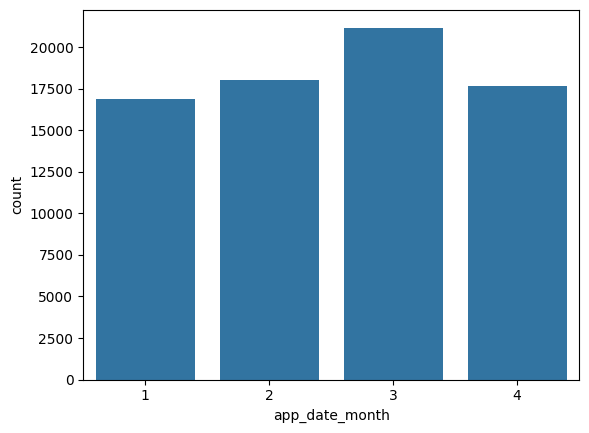

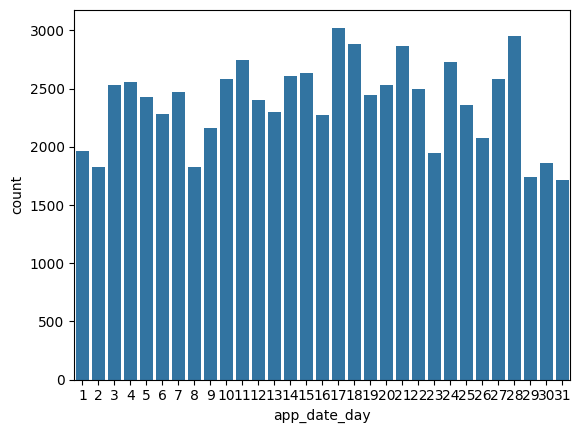

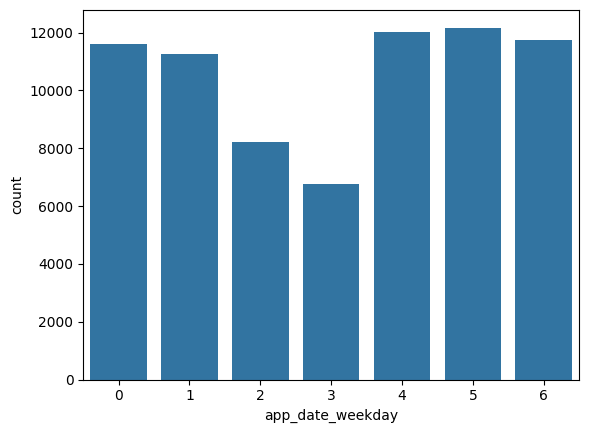

In [13]:
for i in data_train.iloc[:,18:].columns:
    sns.countplot(x = data_train[i], data = data_train)
    plt.show()

In [14]:
# Анализ целевой переменной

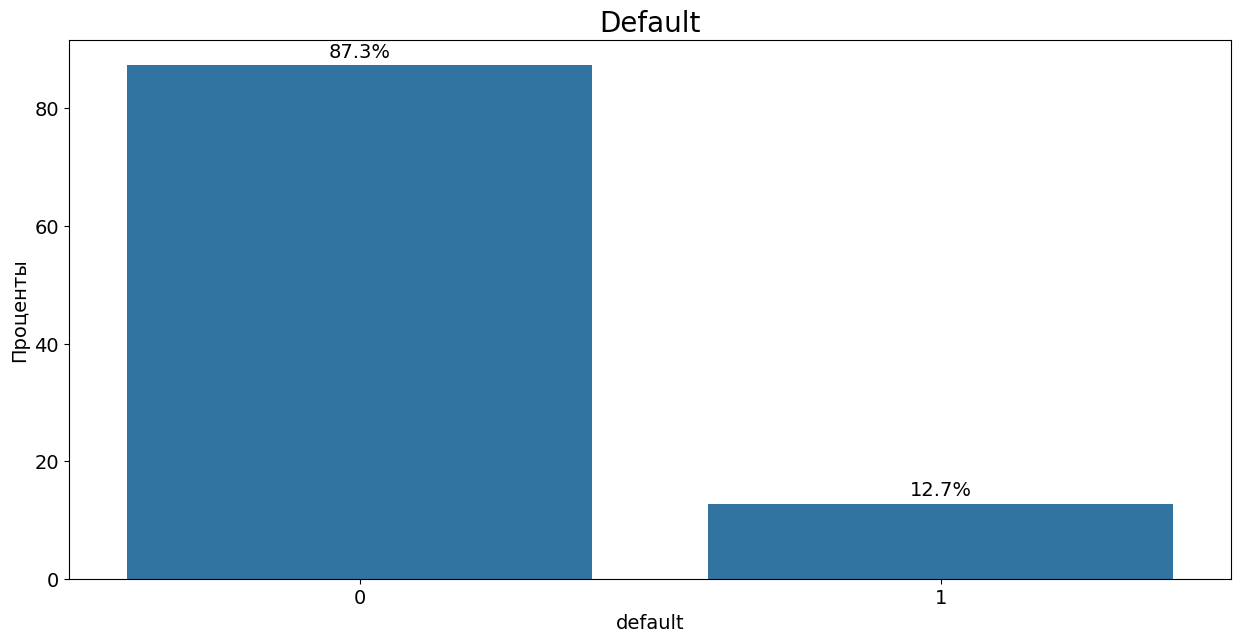

In [15]:
# нормирование на размер датасета
norm_target = (data_train
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='default', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [16]:
# Анализ остальных признаков

<Axes: xlabel='default', ylabel='count'>

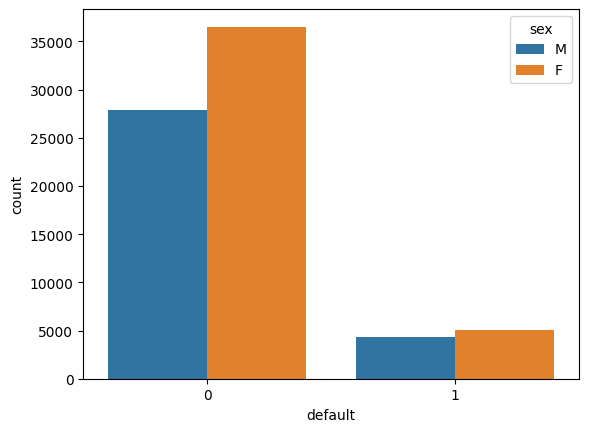

In [17]:
sns.countplot(x= data_train['default'],hue = data_train['sex'], data = data_train)

Text(2.4452638888888902, 0.5, 'Density')

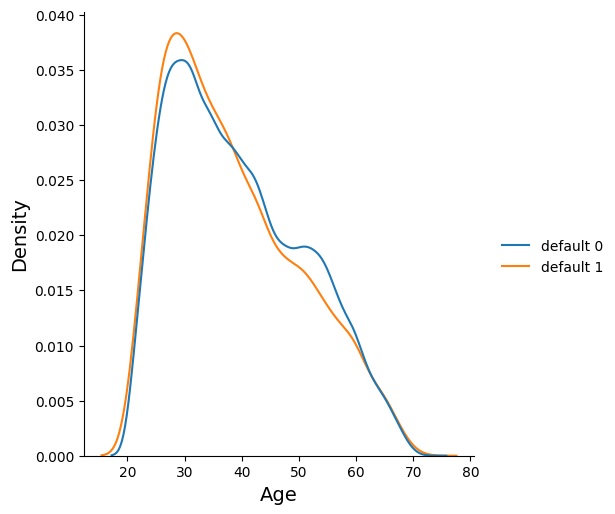

In [18]:
sns.displot({'default 0': data_train[data_train.default == 0].age, 'default 1': data_train[data_train.default == 1].age}, kind="kde", common_norm = False)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [19]:
print('Среднее:', data_train.groupby('default')['age'].mean())
print('Медиана:', data_train.groupby('default')['age'].median())

Среднее: default
0    39.390504
1    38.525395
Name: age, dtype: float64
Медиана: default
0    38.0
1    36.0
Name: age, dtype: float64


In [20]:
# Меньший возраст больше влияет на неуплату кредита

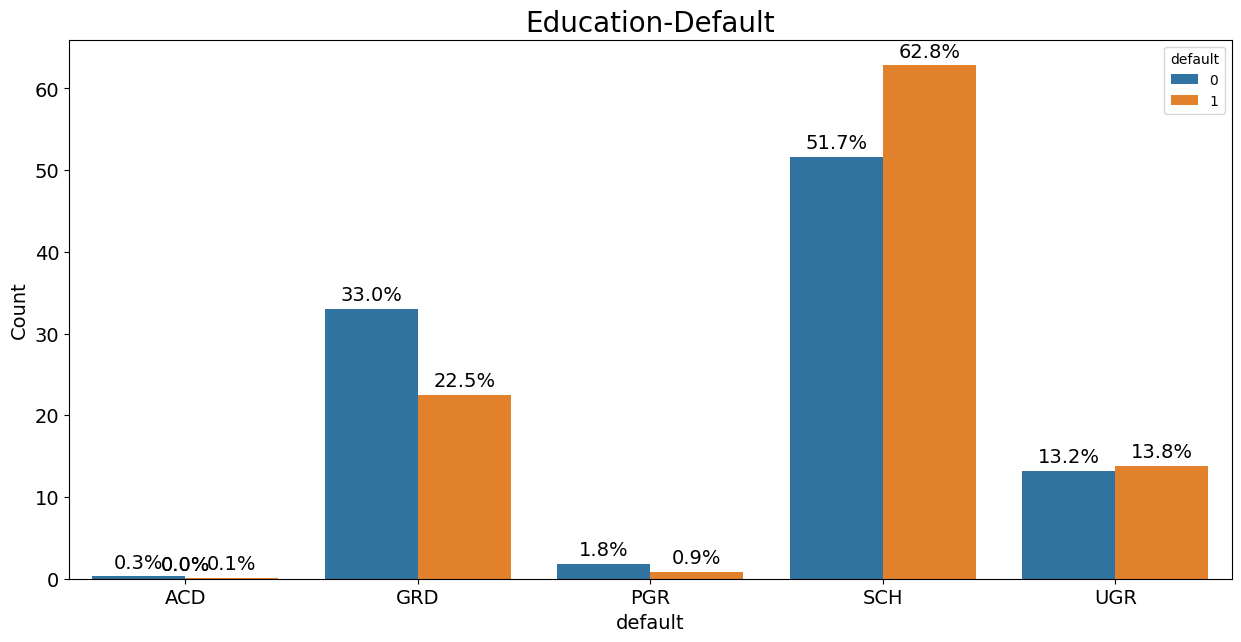

In [21]:
plt.figure(figsize=(15, 7))

educ_def = (data_train.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [22]:
# Посмотрим количесвто людей по образованиям
print(data_train.groupby(['default'])['education']
            .value_counts())

default  education
0        SCH          33280
         GRD          21260
         UGR           8525
         PGR           1176
         ACD            186
1        SCH           5887
         GRD           2105
         UGR           1291
         PGR             81
         ACD              8
Name: count, dtype: int64


<Axes: xlabel='default', ylabel='count'>

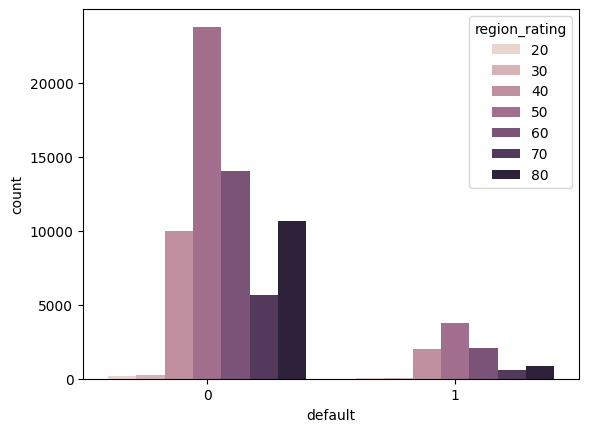

In [23]:
# работаем с регионом

sns.countplot(x= data_train['default'],hue = data_train['region_rating'], data = data_train)

<Axes: xlabel='default', ylabel='count'>

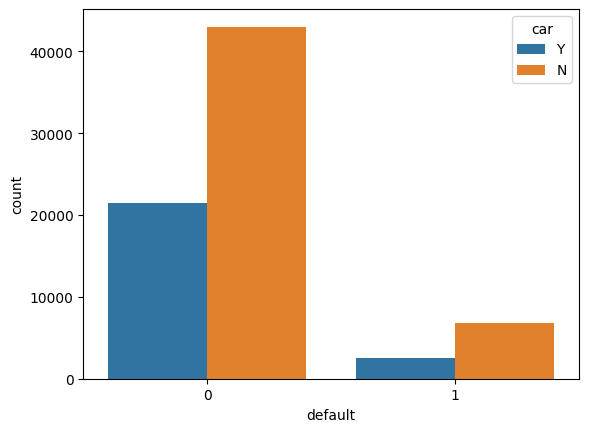

In [24]:
# работаем с машиной

sns.countplot(x= data_train['default'],hue = data_train['car'], data = data_train)

<Axes: xlabel='default', ylabel='count'>

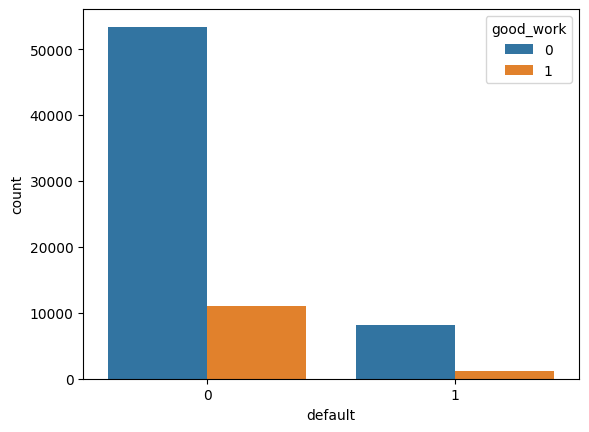

In [25]:
# Влияние работы 
sns.countplot(x= data_train['default'],hue = data_train['good_work'], data = data_train)

<Axes: xlabel='default', ylabel='percentage'>

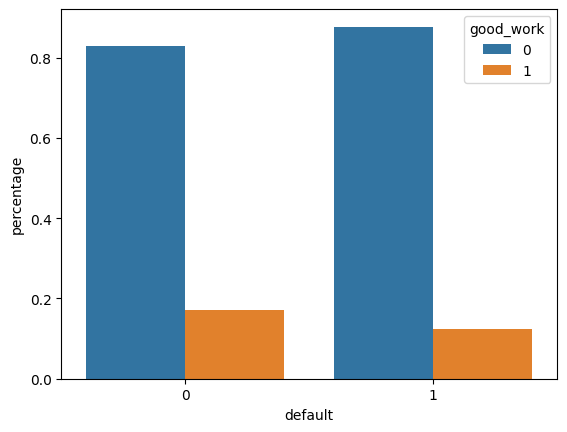

In [26]:
normalized_data = data_train.groupby('default')['good_work'].value_counts(normalize=True).reset_index(name='percentage')

# Построение countplot с нормализованными данными
sns.barplot(x='default', y='percentage', hue='good_work', data=normalized_data)

<Axes: xlabel='default', ylabel='count'>

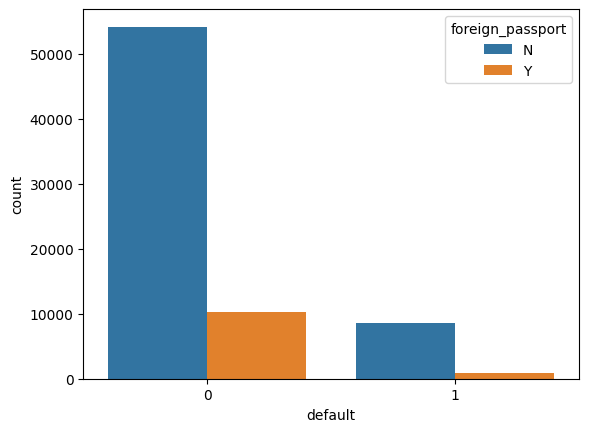

In [27]:
# Загран паспорт
sns.countplot(x= data_train['default'],hue = data_train['foreign_passport'], data = data_train)

<Axes: xlabel='default', ylabel='percentage'>

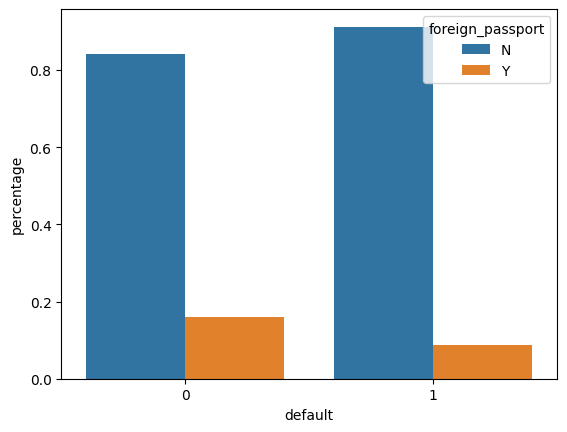

In [28]:
normalized_data = data_train.groupby('default')['foreign_passport'].value_counts(normalize=True).reset_index(name='percentage')

# Построение countplot с нормализованными данными
sns.barplot(x='default', y='percentage', hue='foreign_passport', data=normalized_data)

Text(19.94526388888889, 0.5, 'Density')

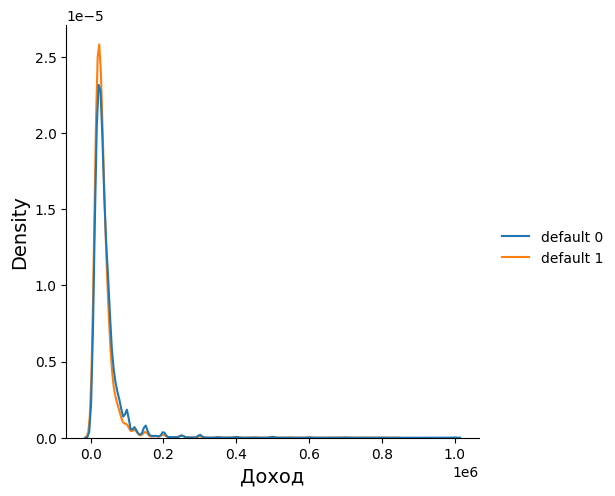

In [29]:
# Влияние дохода
sns.displot({'default 0': data_train[data_train.default == 0].income, 'default 1': data_train[data_train.default == 1].income}, kind="kde", common_norm = False)
plt.xlabel('Доход', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [30]:
print('Средняя зп',  data_train.groupby('default')['income'].mean())
print('Медиана зп', data_train.groupby('default')['income'].median())

Средняя зп default
0    41799.713288
1    36288.113316
Name: income, dtype: float64
Медиана зп default
0    30000.0
1    28000.0
Name: income, dtype: float64


In [31]:
# Логарифмируем Доход
data_train_income = data_train.copy()
data_train_income.income = np.log(data_train_income.income + 1)

Text(19.94526388888889, 0.5, 'Density')

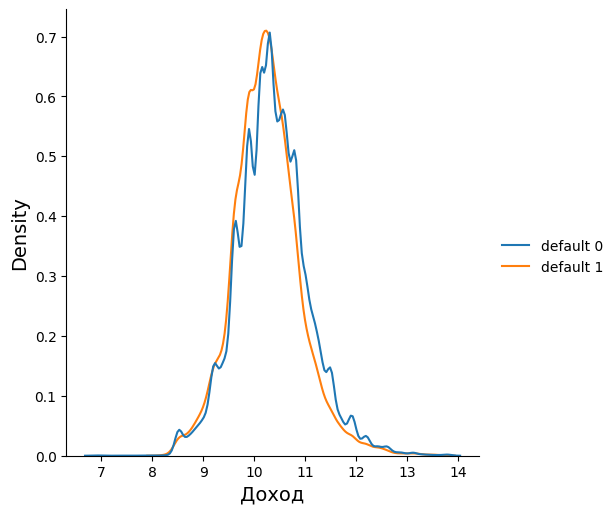

In [32]:
sns.displot({'default 0': data_train_income[data_train_income.default == 0].income, 'default 1': data_train_income[data_train_income.default == 1].income}, kind="kde", common_norm = False)
plt.xlabel('Доход', fontsize=14)
plt.ylabel('Density', fontsize=14)

Text(0.5, 1.0, 'Образование - доход')

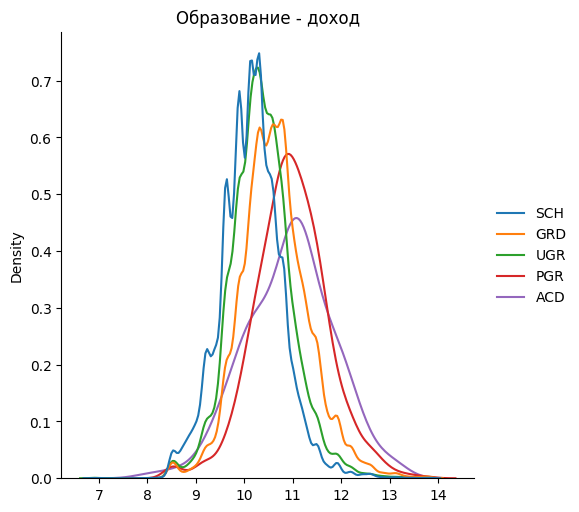

In [33]:
# Проверим влияние образования на доход

sns.displot (
{'SCH': data_train_income[data_train_income.education == 'SCH'].income, 
 'GRD': data_train_income[data_train_income.education == 'GRD'].income,
 'UGR': data_train_income[data_train_income.education == 'UGR'].income,
 'PGR': data_train_income[data_train_income.education == 'PGR'].income,
 'ACD': data_train_income[data_train_income.education == 'ACD'].income
    },
    kind = 'kde',
    common_norm = False
)

plt.title('Образование - доход')

Text(0.5, 1.0, 'Регион - доход')

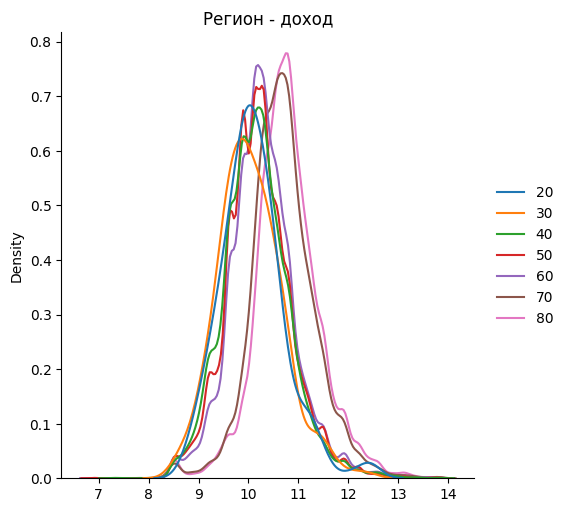

In [34]:
# Проверим влияние рейтинг региона на доход

sns.displot (
{'20': data_train_income[data_train_income.region_rating == 20].income, 
 '30': data_train_income[data_train_income.region_rating == 30].income,
 '40': data_train_income[data_train_income.region_rating == 40].income,
 '50': data_train_income[data_train_income.region_rating == 50].income,
 '60': data_train_income[data_train_income.region_rating == 60].income,
 '70': data_train_income[data_train_income.region_rating == 70].income,
 '80': data_train_income[data_train_income.region_rating == 80].income,
 
    },
    kind = 'kde',
    common_norm = False
)

plt.title('Регион - доход')

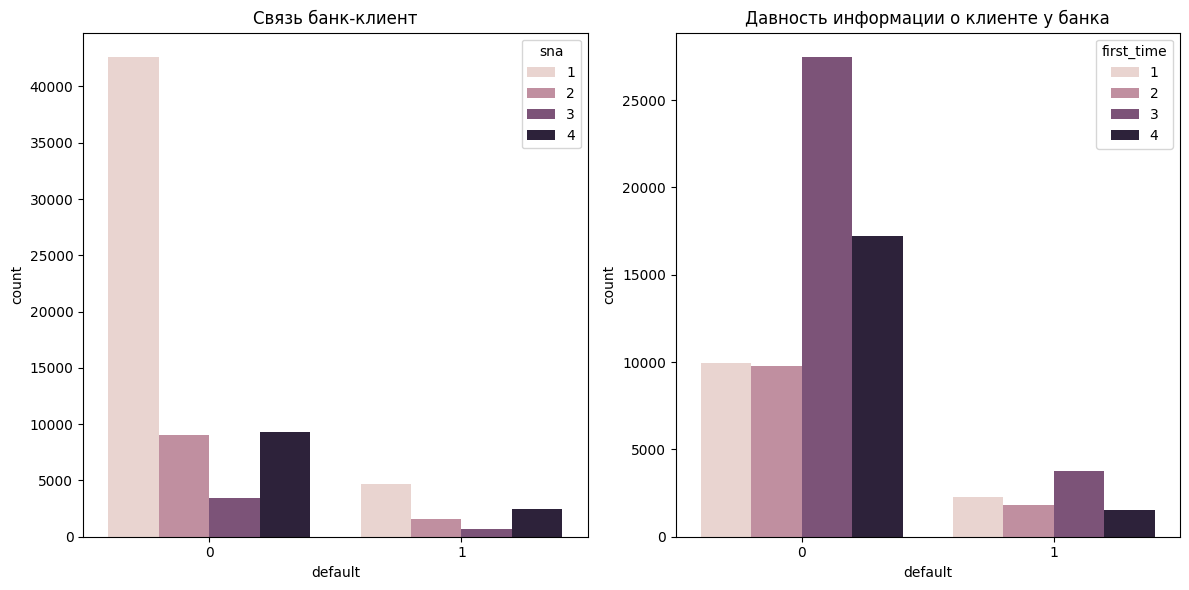

In [35]:
# Проверка Связь банк-клиент с дефолтом (sna)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Первый график
sns.countplot(x=data_train['default'], hue=data_train['sna'], data=data_train, ax=axs[0])
axs[0].set_title('Связь банк-клиент')

# Второй график
sns.countplot(x=data_train['default'], hue=data_train['first_time'], data=data_train, ax=axs[1])
axs[1].set_title('Давность информации о клиенте у банка')

plt.tight_layout()
plt.show()

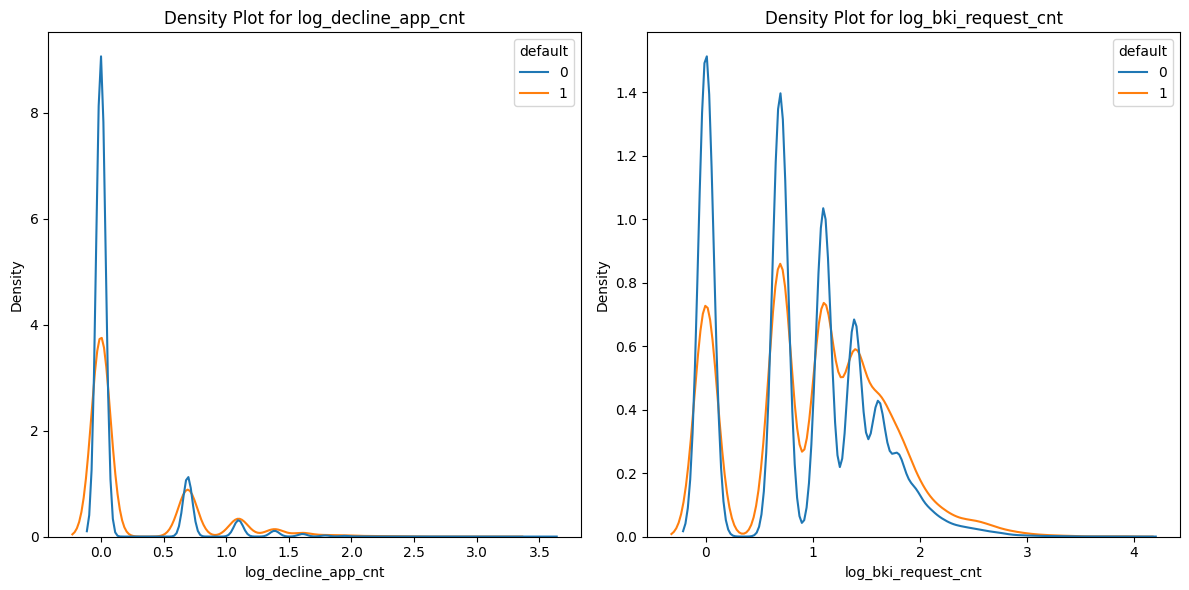

In [36]:
# Проверка влияния отказов в прошлых кредитов и запросов в bki
# deсline_app_cnt - количество отказанных прошлых заявок
# bki_request_cnt - количество запросов в БКИ
data_train['log_decline_app_cnt'] = np.log(data_train['decline_app_cnt']+1)
data_train['log_bki_request_cnt'] = np.log(data_train['bki_request_cnt']+1)
data_test['log_decline_app_cnt'] = np.log(data_test['decline_app_cnt']+1)
data_test['log_bki_request_cnt'] = np.log(data_test['bki_request_cnt']+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График для log_decline_app_cnt
sns.kdeplot(data=data_train, x='log_decline_app_cnt', hue='default', common_norm=False, ax=axs[0])
axs[0].set_title('Density Plot for log_decline_app_cnt')

# График для log_bki_request_cnt
sns.kdeplot(data=data_train, x='log_bki_request_cnt', hue='default', common_norm=False, ax=axs[1])
axs[1].set_title('Density Plot for log_bki_request_cnt')

plt.tight_layout()
plt.show()

In [37]:
list(data_train)
# Пока не сделал дропы старых столбцов других

['client_id',
 'education',
 'sex',
 'age',
 'car',
 'car_type',
 'decline_app_cnt',
 'good_work',
 'score_bki',
 'bki_request_cnt',
 'region_rating',
 'home_address',
 'work_address',
 'income',
 'sna',
 'first_time',
 'foreign_passport',
 'default',
 'app_date_month',
 'app_date_day',
 'app_date_weekday',
 'log_decline_app_cnt',
 'log_bki_request_cnt']

In [38]:
data_train.T

,0,1,2,3,4,5,6,7,8,9,...,73789,73790,73791,73792,73793,73794,73795,73796,73797,73798
client_id,25905,63161,25887,16222,101655,41415,28436,68769,38424,4496,...,44132,87499,37195,82387,6266,54887,76821,103695,861,15796
education,SCH,SCH,SCH,SCH,GRD,SCH,SCH,SCH,SCH,UGR,...,UGR,GRD,SCH,UGR,SCH,GRD,SCH,SCH,SCH,GRD
sex,M,F,M,F,M,M,M,F,F,F,...,M,M,F,F,F,F,M,M,F,M
age,62,59,25,53,48,27,39,39,50,54,...,40,24,54,37,48,45,41,31,29,34
car,Y,N,Y,N,N,Y,N,N,Y,N,...,N,Y,Y,Y,N,N,Y,N,N,N
car_type,Y,N,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,Y,N,N,N
decline_app_cnt,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
good_work,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
score_bki,-2.008753,-1.532276,-1.408142,-2.057471,-1.244723,-2.032257,-2.225004,-1.522739,-1.676061,-2.695176,...,-1.662674,-1.601775,-1.077492,-2.15753,-1.470891,-1.792064,-2.058029,-1.512635,-1.479334,-1.764711
bki_request_cnt,1,3,1,2,1,0,0,1,0,1,...,0,1,2,1,0,3,1,4,3,2


In [39]:
def outliers(column):  # подсчет количества выбросов
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    min_out = Q1 - 1.5 * IQR
    max_out = Q3 + 1.5 * IQR
    return (column < min_out).sum() + (column > max_out).sum(), min_out, max_out

In [40]:
outs, min_out, max_out = outliers(data_train['score_bki'])
print('Всего выбросов score_bki: {} \nДоля выбросов: {}'.format(outs, outs / data_train.shape[0] *100))

Всего выбросов score_bki: 351 
Доля выбросов: 0.47561620076152794


In [41]:
outs, min_out, max_out = outliers(data_train['log_bki_request_cnt'])
print('Всего выбросов log_bki_request_cnt: {} \nДоля выбросов: {}'.format(outs, outs / data_train.shape[0] *100))

Всего выбросов log_bki_request_cnt: 9 
Доля выбросов: 0.012195287199013537


In [42]:
data_train['decline_app_cnt'] = data_train['log_decline_app_cnt']
data_train['bki_request_cnt'] = data_train['log_bki_request_cnt']
data_train['income'] = np.log(data_train['income'])
data_train.pop('log_decline_app_cnt')
data_train.pop('log_bki_request_cnt')
data_test['decline_app_cnt'] = data_test['log_decline_app_cnt']
data_test['bki_request_cnt'] = data_test['log_bki_request_cnt']
data_test['income'] = np.log(data_test['income'])
data_test.pop('log_decline_app_cnt')
data_test.pop('log_bki_request_cnt')

0        1.386294
1        1.098612
2        0.693147
3        0.693147
4        0.000000
           ...   
36344    1.386294
36345    1.386294
36346    0.693147
36347    1.098612
36348    1.098612
Name: log_bki_request_cnt, Length: 36349, dtype: float64

In [43]:
data_train.T

,0,1,2,3,4,5,6,7,8,9,...,73789,73790,73791,73792,73793,73794,73795,73796,73797,73798
client_id,25905,63161,25887,16222,101655,41415,28436,68769,38424,4496,...,44132,87499,37195,82387,6266,54887,76821,103695,861,15796
education,SCH,SCH,SCH,SCH,GRD,SCH,SCH,SCH,SCH,UGR,...,UGR,GRD,SCH,UGR,SCH,GRD,SCH,SCH,SCH,GRD
sex,M,F,M,F,M,M,M,F,F,F,...,M,M,F,F,F,F,M,M,F,M
age,62,59,25,53,48,27,39,39,50,54,...,40,24,54,37,48,45,41,31,29,34
car,Y,N,Y,N,N,Y,N,N,Y,N,...,N,Y,Y,Y,N,N,Y,N,N,N
car_type,Y,N,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,Y,N,N,N
decline_app_cnt,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good_work,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
score_bki,-2.008753,-1.532276,-1.408142,-2.057471,-1.244723,-2.032257,-2.225004,-1.522739,-1.676061,-2.695176,...,-1.662674,-1.601775,-1.077492,-2.15753,-1.470891,-1.792064,-2.058029,-1.512635,-1.479334,-1.764711
bki_request_cnt,0.693147,1.386294,0.693147,1.098612,0.693147,0.0,0.0,0.693147,0.0,0.693147,...,0.0,0.693147,1.098612,0.693147,0.0,1.386294,0.693147,1.609438,1.386294,1.098612


In [44]:
# bin = [sex, car, car_type, foreign_passport, good_work, ]
# cat = [education, decline_app_cnt, region_rating, home_address, work_adress, sna, first_time]
# num = [age, score_bki, bki_request_cnt, income, app_date_month, app_date_day, app_date_weekday]


In [45]:
bin_col = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_col = ['education', 'decline_app_cnt', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
num_col = ['age', 'score_bki', 'bki_request_cnt', 'income', 'app_date_month', 'app_date_day', 'app_date_weekday']

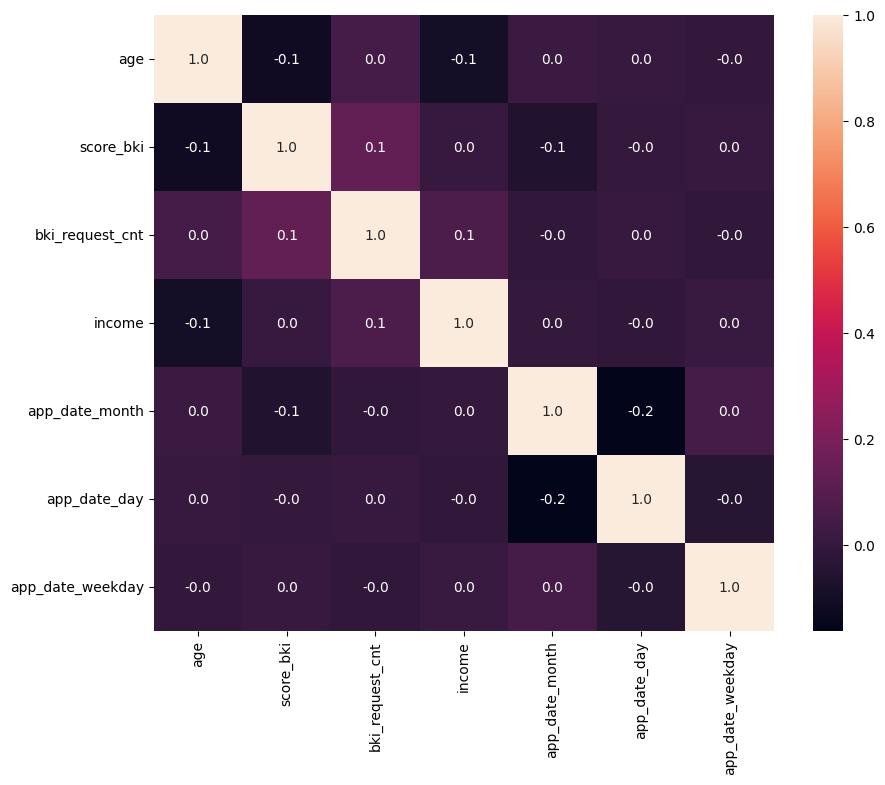

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[num_col].corr(method='spearman'), annot=True, fmt=".1f");

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   education         73799 non-null  object 
 2   sex               73799 non-null  object 
 3   age               73799 non-null  int64  
 4   car               73799 non-null  object 
 5   car_type          73799 non-null  object 
 6   decline_app_cnt   73799 non-null  float64
 7   good_work         73799 non-null  int64  
 8   score_bki         73799 non-null  float64
 9   bki_request_cnt   73799 non-null  float64
 10  region_rating     73799 non-null  int64  
 11  home_address      73799 non-null  int64  
 12  work_address      73799 non-null  int64  
 13  income            73799 non-null  float64
 14  sna               73799 non-null  int64  
 15  first_time        73799 non-null  int64  
 16  foreign_passport  73799 non-null  object

## Модель

In [48]:
def count_metrics(y_test, y_pred, y_probs):    
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)
    metrics['roc_auc'] = roc_auc_score(y_test, y_probs)  
    metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return metrics 

def show_roc_auc(y_test, y_probs):
    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

Категории

In [49]:
label_encoder = LabelEncoder()
for i in bin_col:
    data_train[i] = label_encoder.fit_transform(data_train[i])
data_train[bin_col].head(5)

,sex,car,car_type,foreign_passport,good_work
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,1,0
3,0,0,0,0,0
4,1,0,0,1,1


<Axes: >

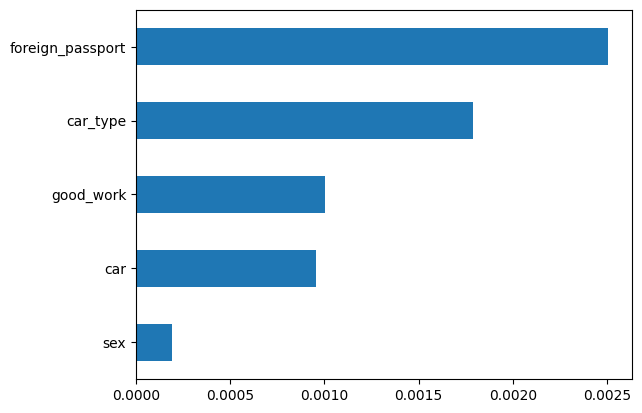

In [50]:
#Значимость 
imp_cat = Series(mutual_info_classif(data_train[data_train.default.isna() == False][bin_col], data_train[data_train.default.isna() == False]['default'],
                                     discrete_features =True), index = bin_col)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

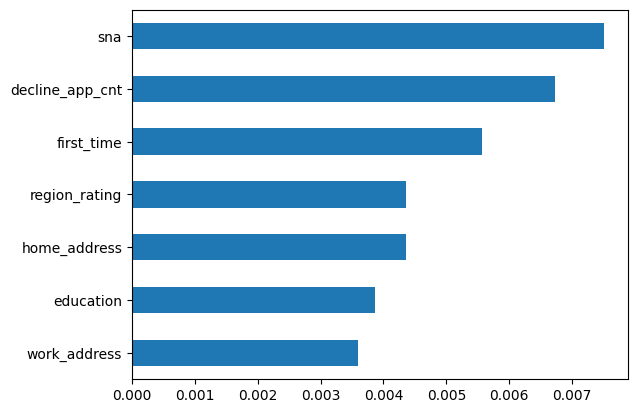

In [51]:
for i in cat_col:
    label_encoder.fit(data_train[i])
    data_train[i] = label_encoder.transform(data_train[i])
    
imp_cat = Series(mutual_info_classif(data_train[data_train.default.isna() == False][cat_col], data_train[data_train.default.isna() == False]['default'],
                                     discrete_features =True), index = cat_col)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Обучение модели базовой

In [52]:
data_train.T

,0,1,2,3,4,5,6,7,8,9,...,73789,73790,73791,73792,73793,73794,73795,73796,73797,73798
client_id,25905.000000,63161.000000,25887.000000,16222.000000,101655.000000,41415.000000,28436.000000,68769.000000,38424.000000,4496.000000,...,44132.000000,87499.000000,37195.000000,82387.000000,6266.000000,54887.000000,76821.000000,103695.000000,861.000000,15796.000000
education,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000
sex,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
age,62.000000,59.000000,25.000000,53.000000,48.000000,27.000000,39.000000,39.000000,50.000000,54.000000,...,40.000000,24.000000,54.000000,37.000000,48.000000,45.000000,41.000000,31.000000,29.000000,34.000000
car,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
car_type,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
decline_app_cnt,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
good_work,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
score_bki,-2.008753,-1.532276,-1.408142,-2.057471,-1.244723,-2.032257,-2.225004,-1.522739,-1.676061,-2.695176,...,-1.662674,-1.601775,-1.077492,-2.157530,-1.470891,-1.792064,-2.058029,-1.512635,-1.479334,-1.764711
bki_request_cnt,0.693147,1.386294,0.693147,1.098612,0.693147,0.000000,0.000000,0.693147,0.000000,0.693147,...,0.000000,0.693147,1.098612,0.693147,0.000000,1.386294,0.693147,1.609438,1.386294,1.098612


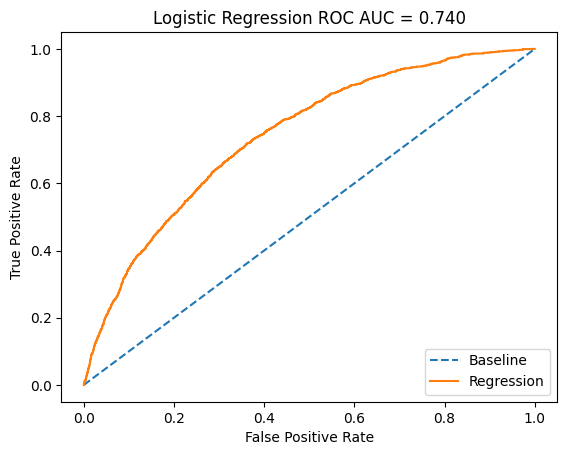

,naive
accuracy,0.874255
f1,0.034339
roc_auc,0.740129
confusion,"[[12871, 62], [1794, 33]]"


In [53]:
X = data_train.drop(['client_id','default'], axis=1).values
Y = data_train['default'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#само обучение
model_naive = LogisticRegression(solver = 'liblinear')
model_naive.fit(X_train, y_train)
y_pred = model_naive.predict(X_test)
y_probs = model_naive.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_naive = count_metrics(y_test, y_pred, y_probs)
data_metrics = pd.DataFrame.from_dict(metrics_naive, orient='index',columns = ['naive'])

show_roc_auc(y_test, y_probs)
display(data_metrics)

<Axes: xlabel='default', ylabel='count'>

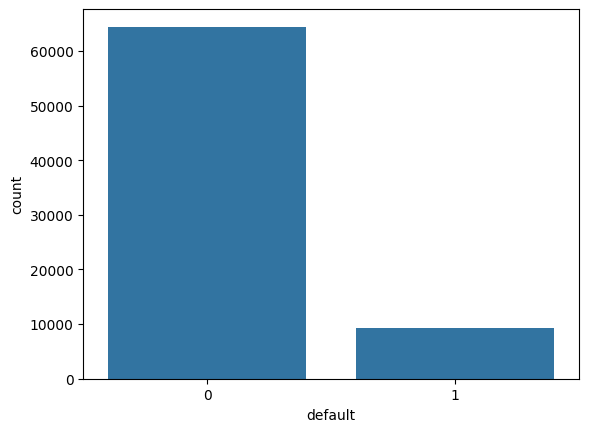

In [54]:
sns.countplot(x = data_train['default'], data = data_train)

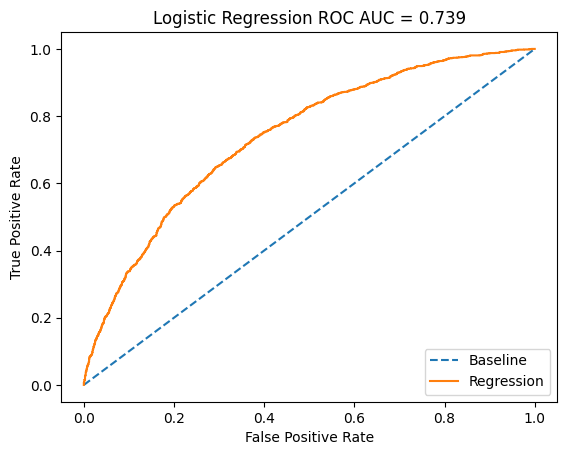

,naive,balanced
accuracy,0.874255,0.675647
f1,0.034339,0.674866
roc_auc,0.740129,0.739211
confusion,"[[12871, 62], [1794, 33]]","[[1271, 616], [600, 1262]]"


In [55]:
#выравниваю категории
classes = data_train.default.value_counts(ascending=True)
minor = data_train[data_train.default == classes.index[0]]
other = data_train[data_train.default.isin(classes.index[1:])][:classes.iloc[0]]
data_train_balanced = pd.concat([other, minor])

X = data_train_balanced.drop(['client_id','default'], axis=1).values
Y = data_train_balanced['default'].values

# Делю данные на еще один тест и трейн
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#само обучение
model_balanced = LogisticRegression(solver = 'liblinear')
model_balanced.fit(X_train, y_train)
y_pred = model_balanced.predict(X_test)
y_probs = model_balanced.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_balanced = count_metrics(y_test, y_pred, y_probs)
data_metrics['balanced'] = pd.Series(metrics_balanced)

show_roc_auc(y_test, y_probs)
display(data_metrics)

<Axes: xlabel='default', ylabel='count'>

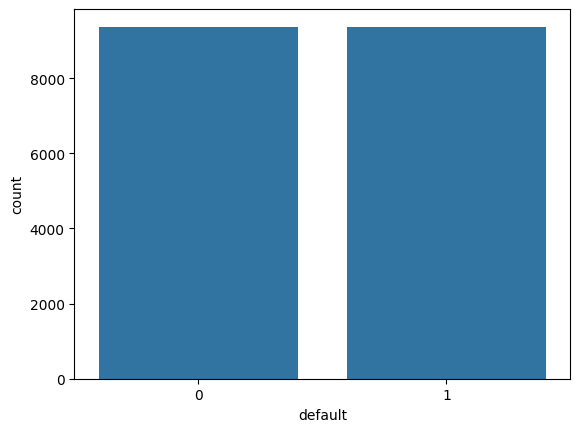

In [70]:
sns.countplot(x = data_train_balanced['default'], data = data_train)

In [56]:
# Задаю ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1','l2']
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l1
Лучшее C: 1.0


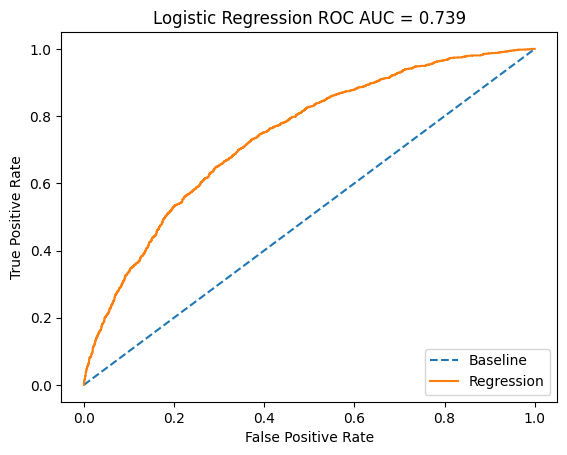

,naive,balanced,finish
accuracy,0.874255,0.675647,0.67458
f1,0.034339,0.674866,0.673971
roc_auc,0.740129,0.739211,0.739193
confusion,"[[12871, 62], [1794, 33]]","[[1271, 616], [600, 1262]]","[[1268, 619], [601, 1261]]"


In [57]:
#обучаю модель с подобранными параметрами
model_finish = LogisticRegression(penalty='l2', C=166.81005372000593, max_iter=1000, solver = 'liblinear')
model_finish.fit(X_train, y_train)

y_pred = model_finish.predict(X_test)
y_probs = model_finish.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_finish = count_metrics(y_test, y_pred, y_probs)
data_metrics['finish'] = pd.Series(metrics_finish)

show_roc_auc(y_test, y_probs)
display(data_metrics)

In [58]:
y_probs.round(2)

array([0.33, 0.68, 0.58, ..., 0.73, 0.46, 0.41])

In [59]:
data_samplesub.sample(3)

,client_id,default
9183,47180,0.478760
14918,76468,0.768972
11911,56491,0.834481


In [60]:
label_encoder = LabelEncoder()
for i in bin_col:
    data_test[i] = label_encoder.fit_transform(data_test[i])

for i in cat_col:
    label_encoder.fit(data_test[i])
    data_test[i] = label_encoder.transform(data_test[i])

In [61]:
data_test_test = data_test.drop(['client_id'], axis=1)

In [62]:
y_pred = model_finish.predict(data_test_test)
y_probs = model_finish.predict_proba(data_test_test)[:,1]

C:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [63]:
data_test['default'] = y_probs.round(3)

In [64]:
count_default_less_than_05 = data_test[data_test['default'] < 0.5]['default'].count()
print("Количество значений 'default' меньше 0.5 в тестовом наборе данных:", count_default_less_than_05)

Количество значений 'default' меньше 0.5 в тестовом наборе данных: 22465


In [65]:
submission = data_test[['client_id','default']]
submission

,client_id,default
0,74835,0.232
1,17527,0.829
2,75683,0.366
3,26883,0.393
4,28862,0.132
...,...,...
36344,83775,0.768
36345,106254,0.111
36346,81852,0.780
36347,1971,0.676


In [66]:
submission.to_csv('sovcombank.csv', index=False)

In [67]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [68]:
def scrape_lenta_archive(start_date, end_date):
    base_url = "https://lenta.ru/rubrics/economics/"
    current_date = start_date
    articles = []
    while current_date <= end_date:
        # Формируем URL для текущей даты
        date_url = current_date.strftime("%Y/%m/%d")
        url = base_url + date_url
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Извлекаем все ссылки на статьи на странице
            links = soup.find_all('li', class_='archive-page__item _news')
            for link in links:
                article_url = link.find('a')['href']
                article_response = requests.get(f'https://lenta.ru/{article_url}')
                if article_response.status_code == 200:
                    article_soup = BeautifulSoup(article_response.text, 'html.parser')
                    # Извлекаем заголовок и текст статьи
                    title = article_soup.find('span', class_='topic-body__title')
                    text_title = str(title.text.strip()) if title else ""
                    text_blocks = article_soup.find_all('p', class_='topic-body__content-text')
                    text = ' '.join([block.text.strip() for block in text_blocks])
                    datatime = soup.find("time", {"class": "card-full-news__info-item card-full-news__date"}).text
                    second_value = datatime.split(',')[1].strip()
                    articles.append({'title': text_title, 'text': text, 'datetime': second_value})
        # Переходим к следующей дате
        current_date += timedelta(days=1)
    return articles

# Укажем период времени, за который хотим собрать новости
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)

# Получим все статьи за указанный период времени
articles = scrape_lenta_archive(start_date, end_date)

# Выведем количество собранных статей
print("Количество собранных статей:", len(articles))


KeyboardInterrupt



In [ ]:
import json
# Укажем имя файла для записи данных
output_file = "lenta_economics_articles_february.json"

# Записываем статьи в файл JSON
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(articles, f, ensure_ascii=False, indent=4)

print(f"Данные успешно записаны в файл: {output_file}")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import nltk
import re

In [ ]:
df_razmetka = pd.read_excel('output_razmetka.xlsx')
df_razmetka

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string


#Загрузка стоп-слов
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Инициализация стоп-слов и лемматизатора
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()


# Функция для предобработки текста
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()

# Токенизация текста
    tokens = word_tokenize(text)

# Удаление пунктуации
    tokens = [token for token in tokens if token not in string.punctuation]

# Удаление стоп-слов
    tokens = [token for token in tokens if token not in stop_words]

# Лемматизация токенов
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Склеивание токенов обратно в текст
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


df_razmetka['title'] = df_razmetka['title'].apply(preprocess_text)
df_razmetka['text'] = df_razmetka['text'].apply(preprocess_text)
df_razmetka

In [ ]:
df_razmetka['text']

In [ ]:
df_razmetka['texttitle'] = df_razmetka['text'] + df_razmetka['title']
df_razmetka['texttitle'] = df_razmetka['texttitle'].astype("str")

In [ ]:
df_razmetka

In [ ]:
data_smi = df_razmetka.drop(['title', 'text', 'datetime'], axis=1)
data_smi['texttitle'] = data_smi['texttitle'].apply(preprocess_text)

data_smi

In [ ]:
data_smi['СМИ_флаг'].unique()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D

In [ ]:
# Предварительная обработка данных
X = data_smi['texttitle']
y = data_smi['СМИ_флаг']

# Преобразование меток классов в числовой формат
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстов в числовые последовательности
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Добавление дополнительных нулей к концу последовательностей для выравнивания их по максимальной длине
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Создание нейронной сети
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    LSTM(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train_sequences, y_train, epochs=10, batch_size=64, validation_data=(X_test_sequences, y_test))

# Оценка производительности модели
loss, accuracy = model.evaluate(X_test_sequences, y_test)
print("Test Accuracy:", accuracy)

In [ ]:
data_march['predicted_flag'] = predicted_classes

In [ ]:
data_march

In [ ]:
# Преобразование DataFrame в словарь
data_dict = data_february.to_dict(orient='records')

# Запись словаря в файл JSON
with open('data_february.json', 'w', encoding='utf-8') as json_file:
    json.dump(data_dict, json_file, ensure_ascii=False, indent=4)

### Февраль

In [ ]:
df_razmetka_february = pd.read_json('lenta_economics_articles_february.json')
df_razmetka_february['texttitle'] = df_razmetka_february['text'] + df_razmetka_february['title']
df_razmetka_february_smi = df_razmetka_february.drop(['title', 'text', 'datetime'], axis=1)
df_razmetka_february_smi['СМИ_флаг'] = ''
df_razmetka_february_smi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Обучим модель ML и сгенириуем данные
# Предварительная обработка данных
X = data_smi['texttitle']
y = data_smi['СМИ_флаг']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Обучение модели
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Оценка производительности модели
y_pred_train = model.predict(X_train_vectorized)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

y_pred_test = model.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Пример предсказания на новых данных
df_razmetka_february_smi
new_X = df_razmetka_february_smi['texttitle']
new_X_vectorized = vectorizer.transform(new_X)
predictions = model.predict(new_X_vectorized)
print("Predictions for new data:", predictions)

In [ ]:
df_razmetka_february_TOP = pd.DataFrame({'texttitle': df_razmetka_february.texttitle, 'СМИ_Флаг': predictions,
                                         'datetime': df_razmetka_february.datetime})
df_razmetka_february_TOP.to_csv('df_razmetka_february_TOP.csv', index=False)
print("Predictions saved to predictions.csv")
df_razmetka_february_TOP


### Март

In [ ]:
# Что я сделаю, объединю январь и февраль, на них предскажу март
df_razmetka_march = pd.read_json('lenta_economics_articles_march.json')
df_razmetka_march['texttitle'] = df_razmetka_march['text'] + df_razmetka_march['title']
df_razmetka_march_smi = df_razmetka_march.drop(['title', 'text', 'datetime'], axis=1)
df_razmetka_march_smi['СМИ_флаг'] = ''
df_razmetka_march_smi['texttitle'] = df_razmetka_march_smi['texttitle'].apply(preprocess_text)
df_razmetka_march_smi

In [ ]:
df_razmetka_february_TOP['СМИ_флаг'] = df_razmetka_february_TOP['СМИ_Флаг']
df_razmetka_february = df_razmetka_february_TOP.drop(['СМИ_Флаг', 'datetime'], axis = 1)
df_jan_feb = pd.concat([data_smi, df_razmetka_february])
df_jan_feb['texttitle'] = df_jan_feb['texttitle'].apply(preprocess_text)

df_jan_feb # Готовый к обучению датафрейм, по нему будем учить март

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Обучим модель ML и сгенириуем данные
# Предварительная обработка данных
X = df_jan_feb['texttitle']
y = df_jan_feb['СМИ_флаг']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Обучение модели
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Оценка производительности модели
y_pred_train = model.predict(X_train_vectorized)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

y_pred_test = model.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Пример предсказания на новых данных
df_jan_feb
new_X = df_razmetka_march_smi['texttitle']
new_X_vectorized = vectorizer.transform(new_X)
predictions = model.predict(new_X_vectorized)
print("Predictions for new data:", predictions)

In [ ]:
df_razmetka_march_TOP = pd.DataFrame({'texttitle': df_razmetka_march_smi.texttitle, 'СМИ_флаг': predictions,
                                         'datetime': df_razmetka_march.datetime})
df_razmetka_march_TOP.to_csv('df_razmetka_march_TOP.csv', index=False)
print("Predictions saved to predictions.csv")
df_razmetka_march_TOP


ТК, январь, февраль и март уже у нас есть с СМИ_флаг, обучим нейросеть по 3 в месяцам

In [ ]:
# Подготовка сета, в котором будут предсказываться метки
df_razmetka_april = pd.read_json('lenta_economics_articles_april.json')
df_razmetka_april['texttitle'] = df_razmetka_april['text'] + df_razmetka_april['title']
df_razmetka_april_smi = df_razmetka_april.drop(['title', 'text', 'datetime'], axis=1)
df_razmetka_april_smi['СМИ_флаг'] = ''
df_razmetka_april_smi['texttitle'] = df_razmetka_april_smi['texttitle'].apply(preprocess_text)
df_razmetka_april_smi

## Апрель

In [ ]:
df_razmetka_march = df_razmetka_march_TOP.drop(['datetime'], axis = 1)
df_jan_feb_march = pd.concat([data_smi, df_razmetka_february, df_razmetka_march])
df_jan_feb_march['texttitle'] = df_jan_feb_march['texttitle'].apply(preprocess_text)

df_jan_feb_march # Готовый к обучению датафрейм, по нему будем учить 

In [ ]:
# Предварительная обработка данных
X = df_jan_feb_march['texttitle']
y = df_jan_feb_march['СМИ_флаг']

# Преобразование меток классов в числовой формат
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстов в числовые последовательности
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Добавление дополнительных нулей к концу последовательностей для выравнивания их по максимальной длине
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Создание нейронной сети
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    LSTM(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train_sequences, y_train, epochs=10, batch_size=64, validation_data=(X_test_sequences, y_test))

# Оценка производительности модели
loss, accuracy = model.evaluate(X_test_sequences, y_test)
print("Test Accuracy:", accuracy)

In [ ]:
new_X = df_razmetka_april_smi['texttitle']
new_X_sequences = tokenizer.texts_to_sequences(new_X)
new_X_sequences = pad_sequences(new_X_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_X_sequences)
predictions_binary = (predictions > 0.5).astype(int)
predicted_classes = label_encoder.inverse_transform(predictions_binary.flatten())
print("Predictions for new data:", predicted_classes)

In [ ]:
df_razmetka_april_TOP = pd.DataFrame({'texttitle': df_razmetka_april_smi.texttitle.values.ravel(), 'СМИ_флаг': predicted_classes, 'datetime': df_razmetka_april.datetime.values.ravel()})
df_razmetka_april_TOP.to_csv('df_razmetka_april_TOP.csv', index=False)
print("Predictions saved to df_razmetka_april_TOP.csv")
df_razmetka_april_TOP

Делаю очередное объединение в один большой df  всех предсказаний

In [ ]:
df_razmetka_february_TOPp = df_razmetka_february_TOP.drop(['СМИ_Флаг'], axis = 1)
df_razmetka_jun_TOP = df_razmetka.drop(['title', 'text'], axis=1)
df_razmetka_jun_TOP['texttitle'] = data_smi['texttitle'].apply(preprocess_text)
df_razmetka_february_TOP

In [ ]:
# Объедините их в список или кортеж
dfs = [df_razmetka_jun_TOP, df_razmetka_february_TOPp, df_razmetka_march_TOP, df_razmetka_april_TOP]

# Используйте pd.concat() с этим списком или кортежем
total_SMI = pd.concat(dfs)

# Выведите результат
total_SMI

In [ ]:
total_SMI.to_csv('total_SMI.csv', index=False)

In [ ]:
pip install dateparser

In [ ]:
import dateparser

total_SMI['datetime'] = total_SMI['datetime'].astype(str)

# Преобразование столбца 'datetime' в тип datetime с использованием dateparser
total_SMI['datetime'] = total_SMI['datetime'].apply(lambda x: dateparser.parse(x).strftime('%Y-%m-%d'))

total_SMI['datetime'] = pd.to_datetime(total_SMI['datetime'])

# Вывод первых нескольких строк столбца 'datetime'
print(total_SMI['datetime'])
print(total_SMI)

In [ ]:
total_SMI['datetime'].dtypes

In [ ]:
df_train2 = pd.read_csv('train.csv')
df_test2 = pd.read_csv('test.csv')

df_train2_date = df_train2[['app_date']]

In [ ]:
df_train2_date['datetime'] = df_train2_date['app_date']
df_train2_datetime = df_train2_date.drop(['app_date'], axis = 1)
df_train2_datetime

In [ ]:
# Преобразуйте столбец 'datetime' в формат datetime
df_train2_datetime['datetime'] = pd.to_datetime(df_train2_datetime['datetime'], format='%d%b%Y')

# Преобразуйте даты обратно в строковый формат 'год-месяц-день'
df_train2_datetime['datetime'] = df_train2_datetime['datetime'].dt.strftime('%Y-%m-%d')


In [ ]:
df_train2_datetime['datetime'] = pd.to_datetime(df_train2_datetime['datetime'])


In [ ]:
df_train2_datetime['datetime'].dtypes

In [ ]:
df_train2_datetime['datetime'] = df_train2_datetime['datetime'] + pd.offsets.DateOffset(years=9)


In [ ]:
df_train2_datetime

In [ ]:
mode_flags = total_SMI.groupby('datetime')['СМИ_флаг'].agg(lambda x: x.mode()[0]).reset_index()
df_merged = pd.merge(df_train2_datetime, mode_flags, on='datetime', how='left')
df_merged

In [ ]:
df_merged.sort_values(by='datetime')

In [ ]:
bin_col_SMI = ['SMI_flag']


label_encoder = LabelEncoder()
for i in bin_col_SMI:
    result_train_not_datetime[i] = label_encoder.fit_transform(result_train_not_datetime[i])
result_train_not_datetime[bin_col_SMI].head(5)


result_train = data_train.join(df_merged, how='inner')
result_train_not_datetime = result_train.drop(['datetime'], axis = 1)
result_train_not_datetime = result_train_not_datetime.rename(columns={'СМИ_флаг': 'SMI_flag'})
result_train_not_datetime.T

Теперь тестовый сет

In [ ]:
label_encoder = LabelEncoder()
for i in bin_col:
    data_test[i] = label_encoder.fit_transform(data_test[i])
data_test[bin_col].head(5)

for i in cat_col:
    label_encoder.fit(data_test[i])
    data_test[i] = label_encoder.transform(data_test[i])

In [ ]:
df_test2_date = df_test2[['app_date']]
df_test2_date['datetime'] = df_test2_date['app_date']
df_test2_datetime = df_test2_date.drop(['app_date'], axis = 1)
df_test2_datetime

In [ ]:
# Преобразуйте столбец 'datetime' в формат datetime
df_test2_datetime['datetime'] = pd.to_datetime(df_test2_datetime['datetime'], format='%d%b%Y')

# Преобразуйте даты обратно в строковый формат 'год-месяц-день'
df_test2_datetime['datetime'] = df_test2_datetime['datetime'].dt.strftime('%Y-%m-%d')


In [ ]:
df_test2_datetime['datetime'] = pd.to_datetime(df_test2_datetime['datetime'])
df_test2_datetime['datetime'] = df_test2_datetime['datetime'] + pd.offsets.DateOffset(years=9)


In [ ]:
df_test2_datetime

In [ ]:
df_test2_datetime.datetime.dtypes

In [ ]:
mode_flags = total_SMI.groupby('datetime')['СМИ_флаг'].agg(lambda x: x.mode()[0]).reset_index()
df_merged_test = pd.merge(df_test2_datetime, mode_flags, on='datetime', how='left')
df_merged_test

In [ ]:
label_encoder = LabelEncoder()
for i in bin_col_SMI:
    result_test_not_datetime[i] = label_encoder.fit_transform(result_test_not_datetime[i])
result_test_not_datetime[bin_col_SMI].head(5)

result_test = data_test.join(df_merged_test, how='inner')
result_test_not_datetime = result_test.drop(['datetime'], axis = 1)
result_test_not_datetime = result_test_not_datetime.rename(columns={'СМИ_флаг': 'SMI_flag'})
result_test_not_datetime.T

Тест и трэин готовы, новое обучение

In [ ]:
def count_metrics(y_test, y_pred, y_probs):    
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)
    metrics['roc_auc'] = roc_auc_score(y_test, y_probs)  
    metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return metrics 

def show_roc_auc(y_test, y_probs):
    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
X = result_train_not_datetime.drop(['client_id','default'], axis=1).values
Y = result_train_not_datetime['default'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#само обучение
model_naive = LogisticRegression(solver = 'liblinear')
model_naive.fit(X_train, y_train)
y_pred = model_naive.predict(X_test)
y_probs = model_naive.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_naive = count_metrics(y_test, y_pred, y_probs)
data_metrics = pd.DataFrame.from_dict(metrics_naive, orient='index',columns = ['naive'])

show_roc_auc(y_test, y_probs)
display(data_metrics)

In [ ]:
#выравниваю категории
classes = result_train_not_datetime.default.value_counts(ascending=True)
minor = result_train_not_datetime[result_train_not_datetime.default == classes.index[0]]
other = result_train_not_datetime[result_train_not_datetime.default.isin(classes.index[1:])][:classes.iloc[0]]
data_train_balanced = pd.concat([other, minor])

X = data_train_balanced.drop(['client_id','default'], axis=1).values
Y = data_train_balanced['default'].values

# Делю данные на еще один тест и трейн
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#само обучение
model_balanced = LogisticRegression(solver = 'liblinear')
model_balanced.fit(X_train, y_train)
y_pred = model_balanced.predict(X_test)
y_probs = model_balanced.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_balanced = count_metrics(y_test, y_pred, y_probs)
data_metrics['balanced'] = pd.Series(metrics_balanced)

show_roc_auc(y_test, y_probs)
display(data_metrics)

In [ ]:
# Задаю ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1','l2']
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
#обучаю модель с подобранными параметрами
model_finish = LogisticRegression(penalty='l1', C=464.15888336127773, max_iter=1000, solver = 'liblinear')
model_finish.fit(X_train, y_train)

y_pred = model_finish.predict(X_test)
y_probs = model_finish.predict_proba(X_test)[:,1]

#посмотрю метрики
metrics_finish = count_metrics(y_test, y_pred, y_probs)
data_metrics['finish'] = pd.Series(metrics_finish)

show_roc_auc(y_test, y_probs)
display(data_metrics)

In [ ]:
y_probs.round(2)
data_samplesub.sample(3)
data_test_test = data_test.drop(['client_id'], axis=1)
y_pred = model_finish.predict(data_test_test)
y_probs = model_finish.predict_proba(data_test_test)[:,1]+

data_test['default'] = y_probs.round(3)
count_default_less_than_05 = data_test[data_test['default'] < 0.5]['default'].count()
print("Количество значений 'default' меньше 0.5 в тестовом наборе данных:", count_default_less_than_05)
submission = data_test[['client_id','default']]
submission
submission.to_csv('sovcombank.csv', index=False)

In [ ]:
bin_col_with_SMI = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work', 'SMI_flag']
cat_col = ['education', 'decline_app_cnt', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
num_col = ['age', 'score_bki', 'bki_request_cnt', 'income', 'app_date_month', 'app_date_day', 'app_date_weekday']
plt.figure(figsize=(10, 8))
sns.heatmap(result_train_not_datetime[bin_col_with_SMI].corr(method='spearman'), annot=True, fmt=".1f");